<a href="https://colab.research.google.com/github/AikaMinami/IPCV_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# **Gamma Correction**

Image Gamma Correction
-----------------------
Gamma value: 3


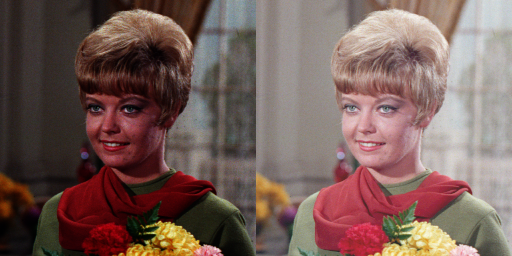

In [ ]:
print('Image Gamma Correction')
print('-----------------------')

try:
  gamma = int(input('Gamma value: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/IPCV/female.tiff')
gamma_image = np.zeros(ori.shape, ori.dtype)

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      gamma_image[y, x, c] = 255 * (ori[y, x, c]/255)**(1/gamma)

final_frame = cv.hconcat((ori, gamma_image))
cv2_imshow(final_frame)

# **Bit Depth**

Bit depth
-----------------------
Bit depth value: 3


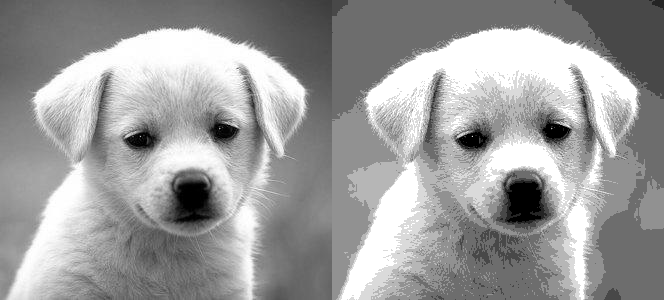

In [ ]:
print('Bit depth')
print('-----------------------')

try:
  bit_depth = int(input('Bit depth value: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/IPCV/woof.jpg')
bit_depth_image = np.zeros(ori.shape, ori.dtype)

def change_bit_depth(bit_depth, ori):  
  cValue = 256 / (2**bit_depth)
  return (ori // cValue)/(2**bit_depth - 1) * 255

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):         
      bit_depth_image[y, x, c] = change_bit_depth(bit_depth, ori[y, x, c]) 

final_frame = cv.hconcat((ori, bit_depth_image))
cv2_imshow(final_frame)

Average Denoising Module
------------------------
Image amount: 100
PSNR value is 27.370931279516654 dB


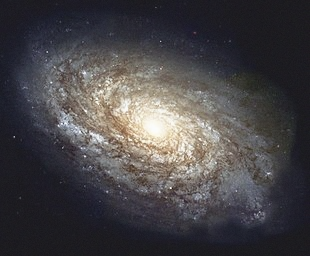

In [12]:
import glob
from math import log10, sqrt

print('Average Denoising Module')
print('------------------------')

try:
  img_amt = int(input('Image amount: '))
except ValueError:
  print('Error, not a number')

def PSNR(ori, compressed):
  mse = np.mean((ori - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

ori = cv.imread('/content/drive/MyDrive/IPCV/galaxy.jpg')
denoising_avg = np.zeros(ori.shape, ori.dtype)

cv_img = []
for i in glob.glob('/content/drive/MyDrive/IPCV/noises/*.jpg'):
  n = cv.imread(i)
  cv_img.append(n)

denoising_avg = np.mean(cv_img[:img_amt], axis=0).astype(np.uint8)

value = PSNR(ori, denoising_avg)
print(f"PSNR value is {value} dB")

final_frame = cv.hconcat((ori, denoising_avg))
cv2_imshow(denoising_avg)